# K-means Clustering

Know more about K-means through this pdf: [K-means](https://drive.google.com/file/d/1sBSwJrNSX1kDZkO3TireB96sgujp2uXt/view?usp=sharing)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import dataset
# Gathered from superdatascience.com

dataset = pd.read_csv('https://raw.githubusercontent.com/dktes/moodle.ai/master/07_K-MEANS_CLUSTERING/mall.csv')

From dataset gathered consisting gender, age, and annual income. Mall owners have calculated the spending scores. Now we want to group customers as per their spending scores, Since we don't know where to split and how to group, clustering should be a good approach.

More the spending score more the customer spends and vice versa.


In [3]:
dataset.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

We shall take the annual income and spending scores for clustering.

In [4]:
X = dataset.iloc[:, [3,4]].values
# first 5 entries
print(X[:5])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


We determine number of clusters using elbow method.First we calculate wcss (within cluster squared sum) (given as SSE) in pdf. Then we plot wcss graph we should see that at start differences are more then they get nearner and nearer. We should find something like elbow, the knee point is our optimal cluster point. 

In [5]:
from sklearn.cluster import KMeans

In [6]:
KMeans?

In [7]:
wcss = []

# we shall try making 10 clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

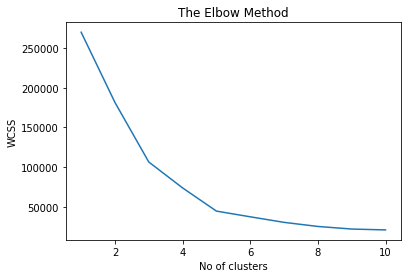

In [8]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')

Thus we have our min no of clusters required i.e, 5

In [9]:
# Now we apply K-means algo on our dataset but this time 
# with right no of clusters

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [10]:
# We see that cus no 1,2,3,4 belong to cluster 4,3,4,3,4 respectively
y_kmeans[:5]

array([4, 3, 4, 3, 4], dtype=int32)

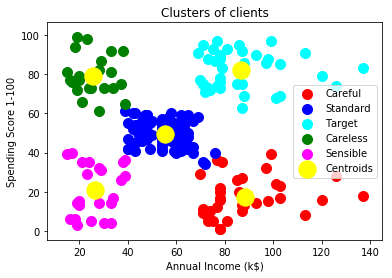

In [11]:
# Visualtize Cluster
# Note cluster nos are not 1-5 but 0-4

# Choose x and y coordinate of data which belong to cluster 1
plt.scatter( X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Careful')
#Similarly others...

plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1, 1], s=100, c='blue', label='Standard')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2, 1], s=100, c='cyan', label='Target')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3, 1], s=100, c='green', label='Careless')
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4, 1], s=100, c='magenta', label='Sensible')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score 1-100')
plt.legend()